In [1]:
%load_ext autoreload

In [2]:
# import classy module
%autoreload 2
from classy import Class

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# create instance of the class "Class"
from classy import Class

LambdaCDM = Class()

LambdaCDM.set({
    'recombination': 'hyrec',
#     'Alpha_inf hyrec file': '../hyrec/Alpha_inf.dat',
    'output':'tCl,pCl,lCl,mPk',
    'lensing':'yes','P_k_max_1/Mpc':3.0
})

LambdaCDM.compute()

hyrec_mod = Class()
# pass input parameters

hyrec_mod.set({
    'recombination': 'recfast',
#     'recombination': 'hyrec',
#     'Alpha_inf hyrec file': '../hyrec/Alpha_BB_n_250_fine.dat',
    'output':'tCl,pCl,lCl,mPk',
    'lensing':'yes','P_k_max_1/Mpc':3.0
})


# run class

hyrec_mod.compute()

/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


Text(0, 0.5, '$(C_\\ell - C_\\ell^\\mathrm{ref})/C_\\ell^\\mathrm{ref} [\\%]$')

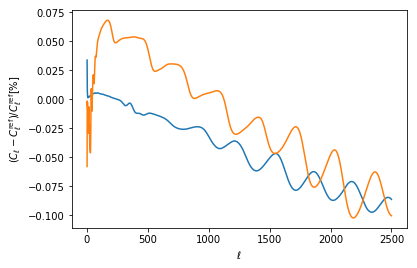

In [4]:
cls_new = hyrec_mod.lensed_cl(2500)
cls_std = LambdaCDM.lensed_cl(2500)

ll_vec_new = cls_new['ell']
ll_vec_std = cls_std['ell']

plt.figure()

ax = plt.gca()

# ax.set_yscale('log')

plt.plot(ll_vec_new, (cls_new['tt']/cls_std['tt'] - 1.)*100)
plt.plot(ll_vec_new, (cls_new['ee']/cls_std['ee'] - 1.)*100)


plt.xlabel(r'$\ell$')
plt.ylabel(r'$(C_\ell - C_\ell^\mathrm{ref})/C_\ell^\mathrm{ref} [\%]$')

In [ ]:
z_rec = LambdaCDM.get_current_derived_parameters(['z_rec'])['z_rec']
Hubble_rec = LambdaCDM.Hubble(z_rec)
# cs_rec = 
print(z_rec)
print('Hubble at rec.:', LambdaCDM.Hubble(z_rec))
print(LambdaCDM.get_thermodynamics()['z'][2661])
R = 3 * LambdaCDM.Omega_b() / (4 * LambdaCDM.Omega_g()) / (1 + z_rec)
print('Photon-baryon sound speed: ', np.sqrt(1/(3*(1 + R))))
print('Sound horizon at rec.: ', LambdaCDM.get_current_derived_parameters(['rs_rec'])['rs_rec'])

In [ ]:
plt.figure()

z_vec = LambdaCDM.get_thermodynamics()['z']
plt.plot(
    z_vec,
    LambdaCDM.Hubble(0) * np.sqrt(
        LambdaCDM.Omega_Lambda() + LambdaCDM.Omega_m() * (1+z_vec)**3 + LambdaCDM.Omega_g()*(1 + 7/8*(4/11)**(4/3)*3.046) * (1+z_vec)**4
    )
)
plt.plot(
    z_vec,
   [LambdaCDM.Hubble(z) for z in z_vec]
)

In [ ]:
np.stack((ll_vec_new, cls_new['tt'], cls_new['ee']), axis=-1)

In [ ]:
cls_new.shape

In [ ]:
import pickle

LambdaCDM_l_Cltt_Clee = np.stack((ll_vec_new, cls_new['tt'], cls_new['ee']), axis=-1)

pickle.dump(LambdaCDM_l_Cltt_Clee, open('/Users/hongwan/GitHub/class/hyrec/LambdaCDM_l_Cltt_Clee.p', 'wb'))

